In [50]:
import numpy as np
import pandas as pd

In [51]:
df = pd.read_csv("munich-air-quality.csv")

In [52]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024/1/1,109,,,,,
1,2023/10/1,62,32,35,25,,
2,2023/10/2,73,18,37,19,,
3,2023/10/3,47,15,31,27,,
4,2023/10/4,29,22,26,26,,


In [53]:
df.shape

(3329, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3329 non-null   object
 1    pm25   3329 non-null   object
 2    pm10   3329 non-null   object
 3    o3     3329 non-null   object
 4    no2    3329 non-null   object
 5    so2    3329 non-null   object
 6    co     3329 non-null   object
dtypes: object(7)
memory usage: 182.2+ KB


In [55]:
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [56]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['date']

0      2024-01-01
1      2023-10-01
2      2023-10-02
3      2023-10-03
4      2023-10-04
          ...    
3324   2019-12-31
3325   2018-12-31
3326   2017-09-09
3327   2016-03-31
3328   2014-12-31
Name: date, Length: 3329, dtype: datetime64[ns]

In [58]:
df.sort_values(by='date', ascending=False, inplace=True)

In [59]:
df.set_index('date', inplace=True)

In [60]:
df.drop(columns=[' o3', ' no2', ' so2', ' co'], inplace=True)

In [61]:
df.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)

In [62]:
df.replace(' ', np.nan, inplace=True)

In [63]:
df['pm10'] = pd.to_numeric(df['pm10'], downcast='float')
df['pm25'] = pd.to_numeric(df['pm25'], downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3329 entries, 2024-01-01 to 2014-08-13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    280 non-null    float32
 1   pm10    3321 non-null   float32
dtypes: float32(2)
memory usage: 52.0 KB


In [64]:
df.describe()

,pm25,pm10
count,280.000000,3321.000000
mean,40.549999,21.609455
std,15.229816,11.630875
min,6.000000,4.000000
25%,29.000000,15.000000
50%,39.000000,19.000000
75%,51.250000,26.000000
max,110.000000,304.000000


In [65]:
df['pm10'].nlargest(10)

date
2017-01-01    304.0
2020-01-01    169.0
2017-01-02    140.0
2016-01-01    114.0
2023-12-31    113.0
2017-01-23     90.0
2017-01-24     89.0
2017-01-29     82.0
2017-01-22     81.0
2015-01-01     81.0
Name: pm10, dtype: float32

In [66]:
df['pm10'].nsmallest(10)

date
2023-12-23    4.0
2020-09-27    4.0
2023-12-22    5.0
2020-09-26    5.0
2019-01-13    5.0
2015-01-11    5.0
2023-08-05    6.0
2023-01-15    6.0
2021-11-30    6.0
2021-03-14    6.0
Name: pm10, dtype: float32

In [67]:
df.groupby([df.index.year, df.index.month]).first()

pm25   pm10
date date              
2014 8       NaN   17.0
     9       NaN   25.0
     10      NaN   31.0
     11      NaN   14.0
     12      NaN   14.0
...          ...    ...
2023 9      57.0   26.0
     10     22.0   10.0
     11     50.0   18.0
     12     37.0  113.0
2024 1     109.0    NaN

[113 rows x 2 columns]

In [68]:
df_weeks_pm10 = df['pm10'].resample('W').median()
df_weeks_pm10.head()

date
2014-08-17    14.0
2014-08-24    18.0
2014-08-31    17.0
2014-09-07    23.0
2014-09-14    25.0
Freq: W-SUN, Name: pm10, dtype: float32

In [69]:
df_weeks_pm10.nlargest(10)

date
2017-01-29    72.0
2021-02-28    61.0
2017-02-12    50.0
2019-01-27    50.0
2019-02-24    49.0
2015-03-22    47.0
2017-02-19    47.0
2015-02-22    46.0
2020-01-26    46.0
2018-03-04    44.0
Name: pm10, dtype: float32

In [70]:
df_weeks_pm10.nsmallest(10)

date
2023-12-24     7.0
2018-01-21     8.0
2019-01-13     9.0
2019-03-17     9.0
2021-08-29     9.0
2017-09-10    10.0
2021-12-05    10.0
2022-01-09    10.0
2023-01-15    10.0
2023-11-05    10.0
Name: pm10, dtype: float32

In [71]:
df_months_pm10 = df['pm10'].resample('M').median()
df_months_pm10.head()

date
2014-08-31    17.0
2014-09-30    22.5
2014-10-31    21.0
2014-11-30    21.5
2014-12-31    17.0
Freq: M, Name: pm10, dtype: float32

In [72]:
df_months_pm10.nlargest(10)

date
2015-02-28    39.0
2016-01-31    36.0
2017-01-31    36.0
2020-01-31    33.0
2019-02-28    32.0
2022-03-31    31.0
2015-03-31    30.0
2016-12-31    30.0
2018-03-31    30.0
2017-02-28    28.0
Name: pm10, dtype: float32

In [73]:
df_months_pm10.nsmallest(10)

date
2021-05-31    12.0
2023-11-30    12.0
2021-08-31    13.0
2022-09-30    13.0
2023-08-31    14.0
2016-06-30    15.0
2018-01-31    15.0
2020-06-30    15.0
2022-02-28    15.0
2023-01-31    15.0
Name: pm10, dtype: float32

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

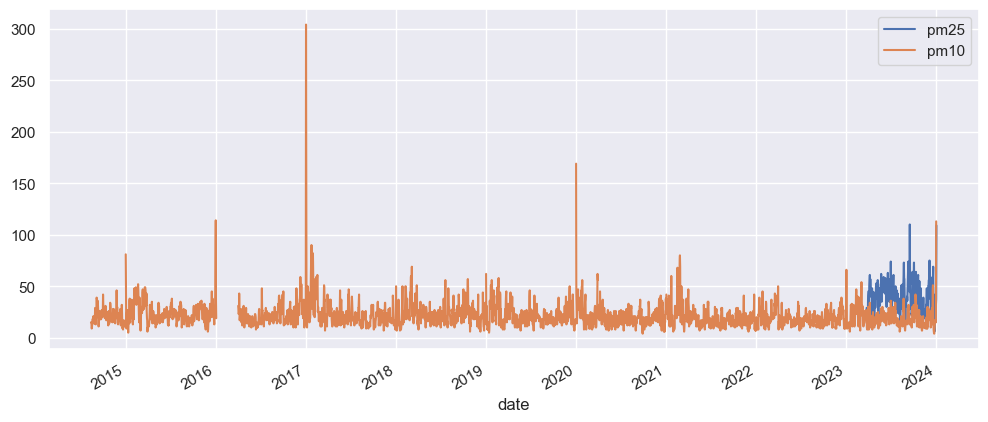

In [75]:
df.plot()

<Axes: xlabel='date'>

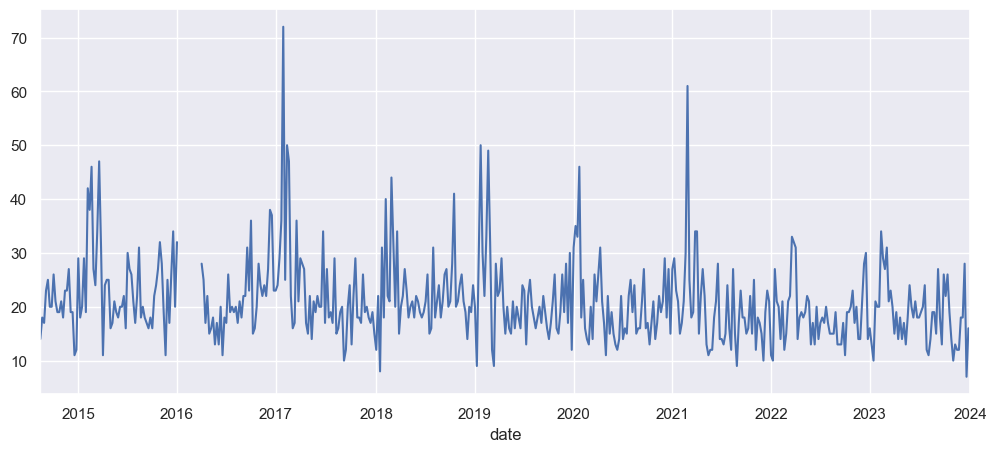

In [76]:
df_weeks_pm10.plot()

<Axes: xlabel='date'>

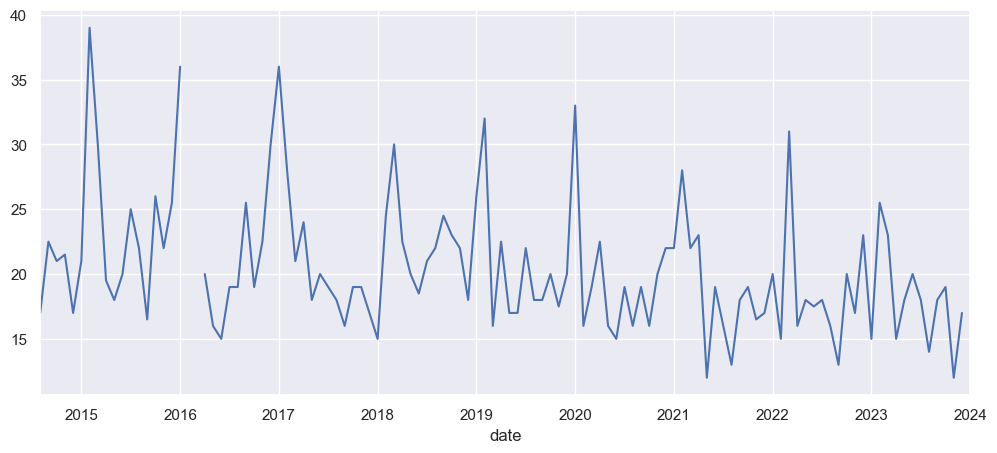

In [77]:
df_months_pm10.plot()

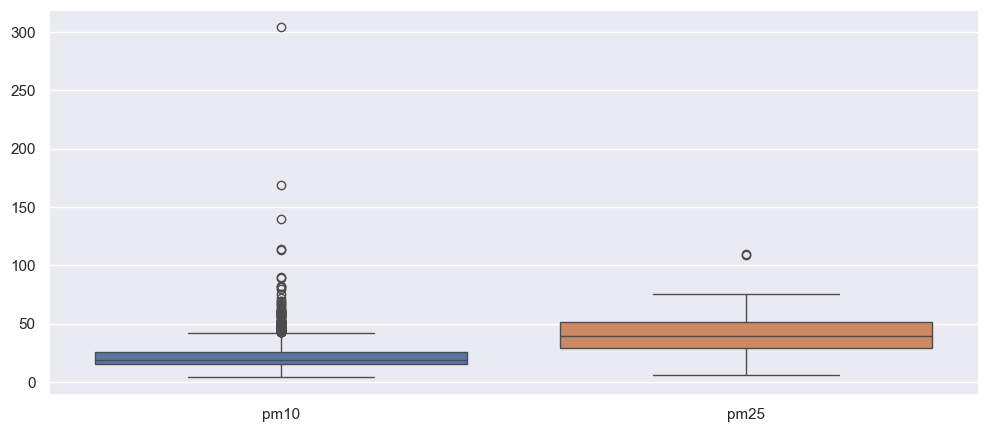

In [78]:
sns.boxplot(data=df.loc[:, ['pm10', 'pm25']])
plt.show()

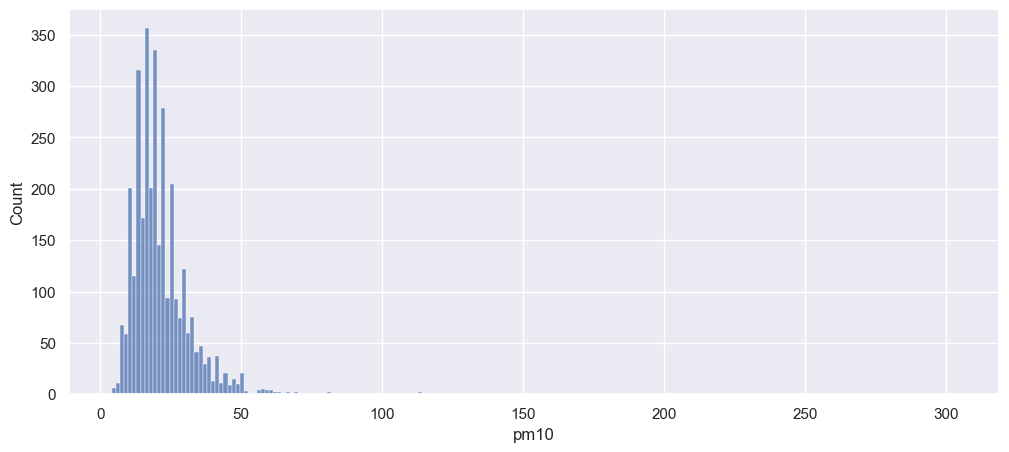

In [79]:
sns.histplot(df['pm10'])
plt.show()

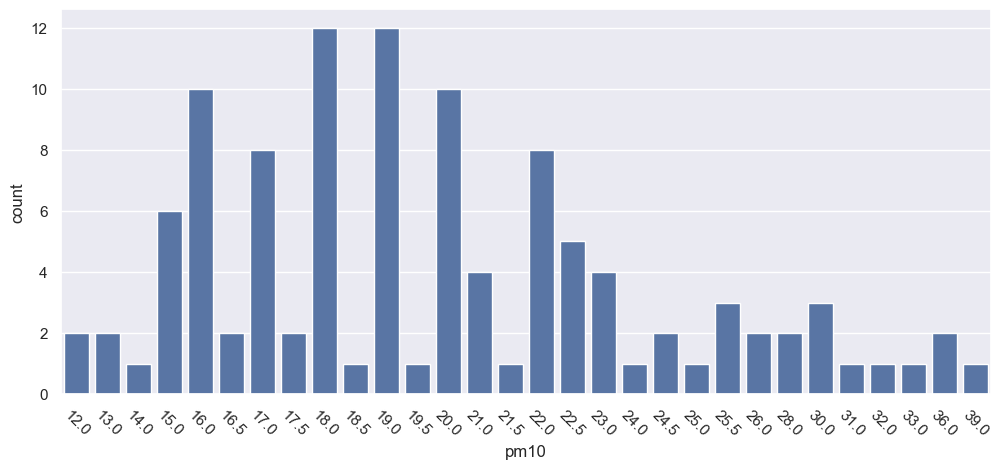

In [80]:
df_months_pm10 = df_months_pm10.to_frame() 
sns.countplot(x='pm10', data=df_months_pm10)
plt.xticks(rotation=-45)
plt.show()

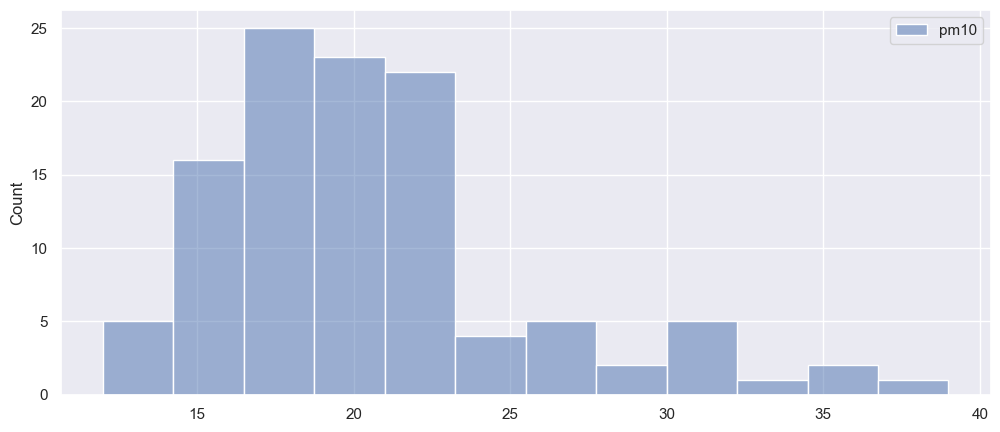

In [81]:
sns.histplot(df_months_pm10)
plt.show()

In [82]:
df_months_pm25 = df['pm25'].resample('M').median()
df_months_pm25 = df_months_pm25.to_frame() 

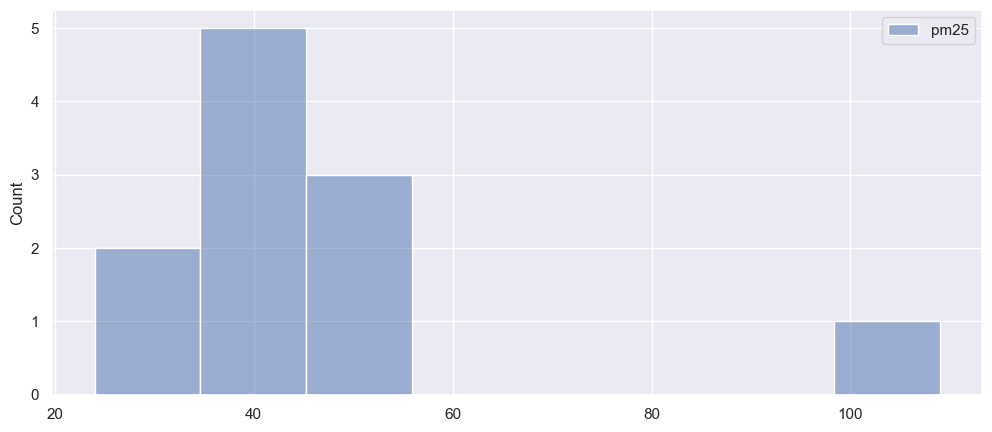

In [83]:
sns.histplot(df_months_pm25)
plt.show()

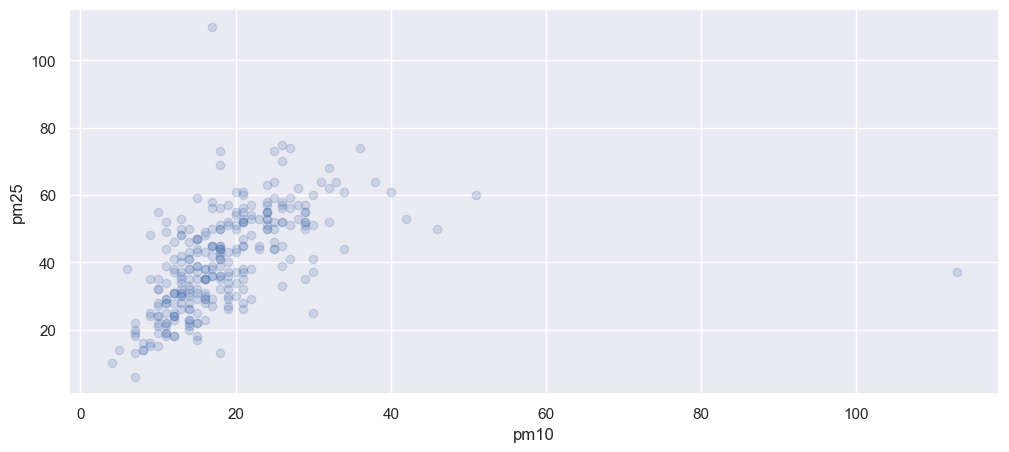

In [84]:
sns.regplot(x='pm10', y='pm25', data=df, fit_reg=False, scatter_kws={"alpha": 0.2});

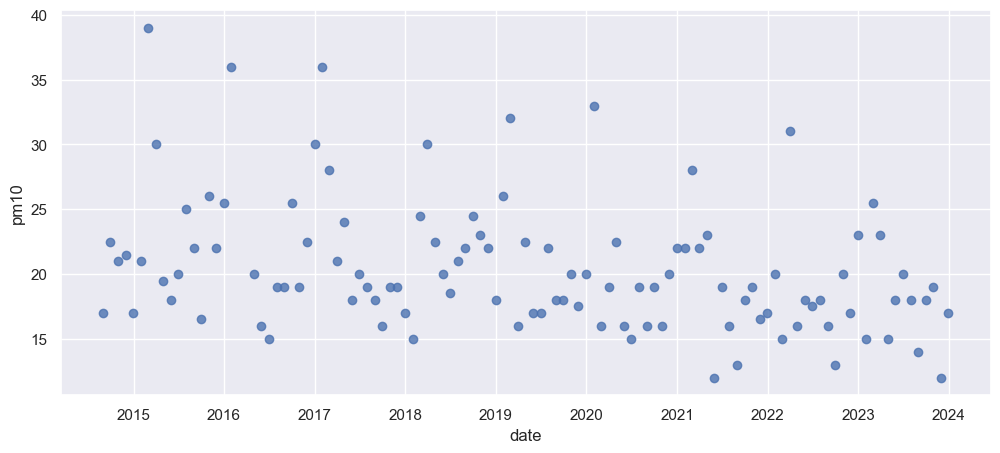

In [85]:
sns.set(rc={'figure.figsize':(12,5)})
sns.regplot(x=df_months_pm10.index, y='pm10', data=df_months_pm10, fit_reg=False);

<Axes: xlabel='date', ylabel='pm10'>

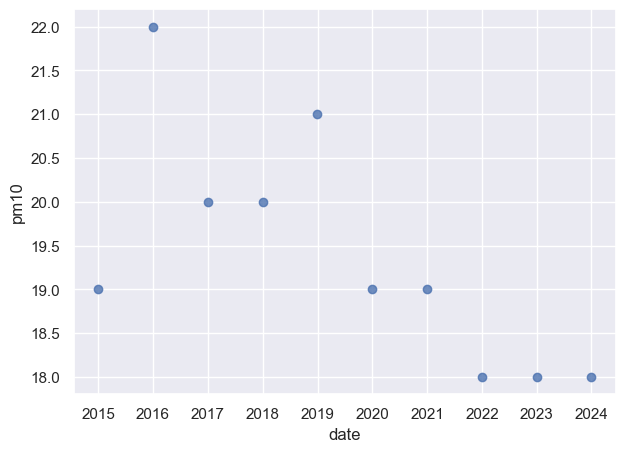

In [86]:
df_years_pm10 = df['pm10'].resample('Y').median()
df_years_pm10 = df_years_pm10.to_frame() 
plt.figure(figsize=(7, 5))
sns.regplot(x=df_years_pm10.index, y='pm10', data=df_years_pm10, fit_reg=False) 

<Axes: xlabel='date', ylabel='pm10'>

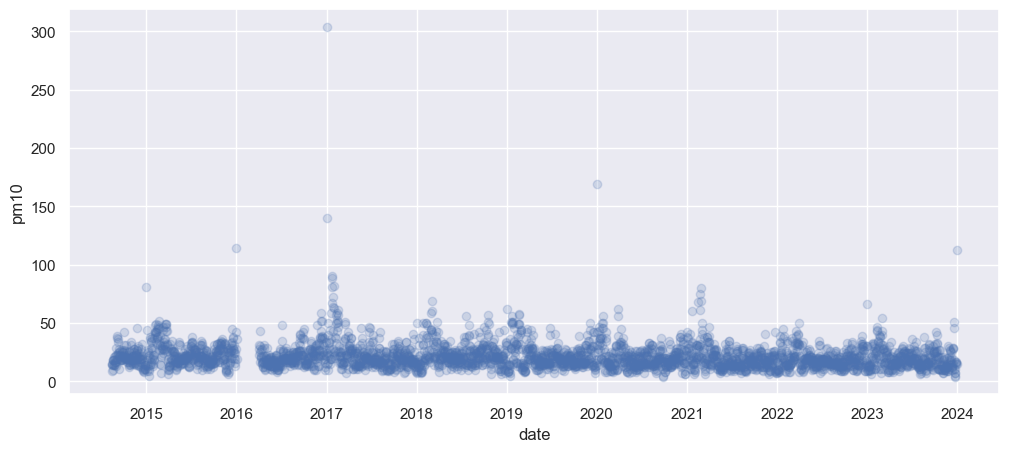

In [87]:
sns.regplot(x=df.index, y='pm10', data=df, fit_reg=False, scatter_kws={"alpha": 0.2}) 

<Axes: xlabel='date', ylabel='pm25'>

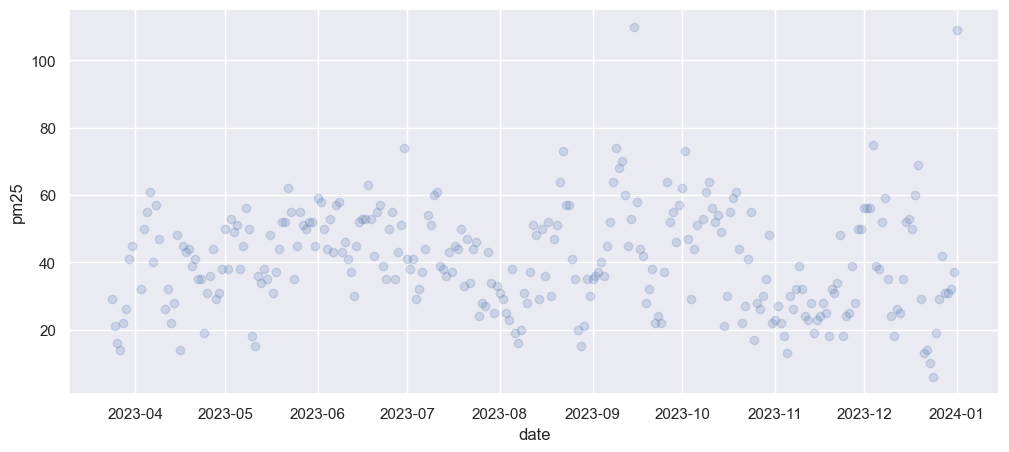

In [88]:
sns.regplot(x=df.index, y='pm25', data=df, fit_reg=False, scatter_kws={"alpha": 0.2}) 